<a href="https://colab.research.google.com/github/vinigoia/Analise-Musicas-Populares-TikTok-em-2021/blob/main/An%C3%A1lise_01_M%C3%BAsicas_Tik_Tok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<left><img alt="Linkedin logo" width="10%" src="https://pngimg.com/uploads/tiktok/tiktok_PNG3.png"><left>

#**Músicas Populares no TikTok 2021**

---


In [1]:
#Importando bibliotecas
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Montando o drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
#Importando o dataset em uma variável
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Arquivos para Análise/TikTok_songs_2021.csv')

In [4]:
#Mostrando o cabeçalho com as 5 primeiras linhas
df.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,STAY (with Justin Bieber),The Kid LAROI,83,STAY (with Justin Bieber),89,0.591,0.764,-5.484,1,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4,141806
1,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,90,Justice,86,0.677,0.696,-6.181,1,0,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4,198082
2,edamame (feat. Rich Brian),bbno$,72,edamame (feat. Rich Brian),77,0.815,0.848,-4.704,0,4,0.1150,0.0230,0.000162,0.0265,0.684,106.032,4,133707
3,Here's Your Perfect,Jamie Miller,65,Here's Your Perfect,77,0.558,0.454,-5.335,1,6,0.0551,0.4990,0.000000,0.1460,0.424,113.120,4,158594
4,It's You,Sezairi,57,It's You,73,0.630,0.456,-8.285,1,8,0.0317,0.5450,0.000000,0.1140,0.166,137.915,3,251440


----

Observando as informações do dataset, podemos extrair algumas perguntas as quais gerarão insghts sobre as preferências do público em geral no ano de 2021:

- Os artistas mais populares têm as músicas mais populares?
- As músicas mais populares são dos artistas mais populares?
- As músicas mais populares são as músicas mais dançantes?
- As músicas mais populares são as músicas mais enérgicas?
- As músicas mais populares são as músicas mais altas?
- As músicas mais populares estão em que modo (Maior ou Menor)?
- As músicas mais populares estão em qual tonalidade (C=0, c#/Db=1, D=2, etc)?
- Quantas vezes o mesmo artista aparece na lista?

Vale lembrar que atualmente há estudos relacionados à melodia e à harmonia das músicas com relação a sua fixação no cerébro humano. Ou seja, é uma fábrica de hits que visa o consumo rápido e a comercialização de arte. Não que seja algo ruim para a indústria, mas poderemos encontrar aqui características muito similares entre uma obra e outra.


----

In [5]:
#Mostrando o cabeçalho com as 20 primeiras linhas em ordem numérica
df.sort_values(by='artist_pop', ascending=False).head(20)

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
147,In The Bible (with Lil Durk & Giveon),Drake,95,Certified Lover Boy,72,0.686,0.385,-8.350,0,7,0.2970,0.61400,0.000000,0.1310,0.147,143.070,4,296568
120,Wildest Dreams,Taylor Swift,93,1989,78,0.553,0.664,-7.417,1,8,0.0741,0.07090,0.005600,0.1060,0.467,140.060,4,220440
169,Save Your Tears,The Weeknd,93,After Hours,88,0.680,0.826,-5.487,1,0,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,215627
182,Save Your Tears (with Ariana Grande) (Remix),The Weeknd,93,Save Your Tears (Remix),84,0.650,0.825,-4.645,1,0,0.0325,0.02150,0.000024,0.0936,0.593,118.091,4,191014
163,Style,Taylor Swift,93,1989 (Deluxe),79,0.588,0.791,-5.595,1,7,0.0402,0.00245,0.002580,0.1180,0.487,94.933,4,231000
68,Permission to Dance,BTS,91,Butter / Permission to Dance,11,0.702,0.741,-5.330,1,9,0.0427,0.00544,0.000000,0.3370,0.646,124.925,4,187585
69,Butter,BTS,91,"Butter (Hotter, Sweeter, Cooler)",15,0.759,0.459,-5.187,1,8,0.0948,0.00323,0.000000,0.0906,0.695,109.997,4,164442
180,Ghost,Justin Bieber,90,Justice,89,0.601,0.741,-5.569,1,2,0.0478,0.18500,0.000029,0.4150,0.441,153.960,4,153190
93,Bad Habits,Ed Sheeran,90,Bad Habits,22,0.808,0.897,-3.712,0,11,0.0348,0.04690,0.000031,0.3640,0.591,126.026,4,231041
176,Love Me,Justin Bieber,90,My World,68,0.729,0.868,-3.319,1,3,0.0609,0.00939,0.000000,0.2830,0.632,124.957,4,191573


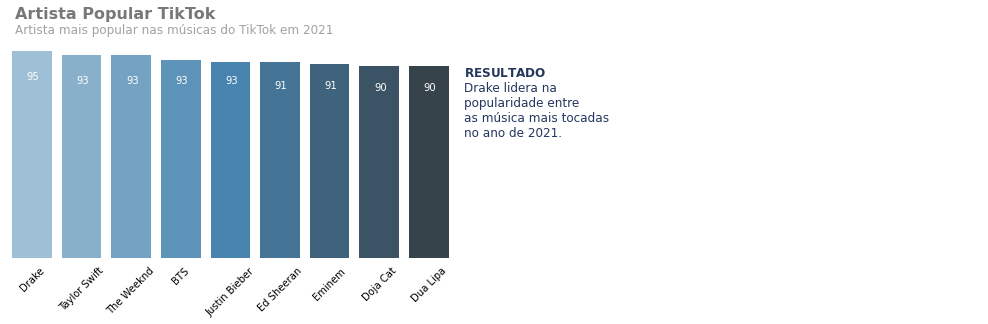

In [30]:
# definindo cores do gráfico
CINZA1, CINZA2, CINZA3= "#CFCDCE", "#A2A1A3", "#787878"
AZUL1, AZUL2 = "#8db7eb", "#253760"

# configurar a visualização
width_bar = 0.0

artist_pop=df.sort_values(by='artist_pop', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8, 4))

# labels do eixo
x = np.arange(len(artist_pop["artist_name"]))

# parametro para plotagem
rects1 = ax.bar(x - width_bar/2, artist_pop["artist_pop"], width_bar, label='Antes')

sns.barplot(x="artist_name", y="artist_pop", data=artist_pop, palette="Blues_d")
plt.xticks(rotation=45)
ax.set_xlabel('')

# remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True)

# criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(1, -30),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="white",
                    )
        
# plotar labels dentro das barras
autolabel(rects1)

# plotar título
plt.text(-0.35, 110, 'Artista Popular TikTok',
         fontsize=16, 
         color=CINZA3,
         weight='bold')

# plotar subtitulo

plt.text(-0.35, 108,
         "Artista mais popular nas"
         " músicas do TikTok em 2021",
         verticalalignment="top",
         fontsize=12,
         color=CINZA2)

# plotar anotações do resultado da campanha
plt.text(8.7, 88,
         "$\\bf{RESULTADO}$\n"
         "Drake lidera na\n"
         "popularidade entre\n"
         "as música mais tocadas\n"
         "no ano de 2021."
         ,
         verticalalignment="top",
         fontsize=12,
         color=AZUL2)


# plotar o gráfico
plt.show()


In [225]:
#Mostrando o cabeçalho com as 20 primeiras linhas em ordem numérica
df.sort_values(by='track_pop', ascending=False).head(20)

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
183,MIDDLE OF THE NIGHT,Elley Duhé,75,MIDDLE OF THE NIGHT,91,0.410,0.611,-8.271,0,4,0.0467,0.02280,0.000000,0.1160,0.0899,185.727,3,184448
61,Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.01570,0.000000,0.0864,0.4540,116.959,3,233720
180,Ghost,Justin Bieber,90,Justice,89,0.601,0.741,-5.569,1,2,0.0478,0.18500,0.000029,0.4150,0.4410,153.960,4,153190
0,STAY (with Justin Bieber),The Kid LAROI,83,STAY (with Justin Bieber),89,0.591,0.764,-5.484,1,1,0.0483,0.03830,0.000000,0.1030,0.4780,169.928,4,141806
64,Woman,Doja Cat,88,Planet Her,89,0.824,0.764,-4.175,0,5,0.0854,0.08880,0.002940,0.1170,0.8810,107.998,4,172627
8,deja vu,Olivia Rodrigo,85,SOUR,88,0.442,0.612,-7.222,1,2,0.1120,0.58400,0.000006,0.3700,0.1780,180.917,4,215507
169,Save Your Tears,The Weeknd,93,After Hours,88,0.680,0.826,-5.487,1,0,0.0309,0.02120,0.000012,0.5430,0.6440,118.051,4,215627
62,drivers license,Olivia Rodrigo,85,SOUR,88,0.561,0.431,-8.810,1,10,0.0578,0.76800,0.000014,0.1060,0.1370,143.875,4,242013
97,THATS WHAT I WANT,Lil Nas X,81,MONTERO,88,0.737,0.846,-4.510,0,1,0.2200,0.00614,0.000000,0.0486,0.5460,87.981,4,143901
167,abcdefu,GAYLE,71,abcdefu,87,0.695,0.540,-5.692,1,4,0.0493,0.29900,0.000000,0.3670,0.4150,121.932,4,168602


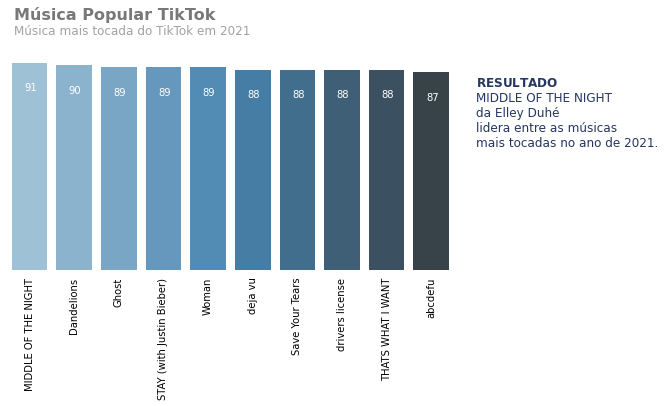

In [100]:
# definindo cores do gráfico
CINZA1, CINZA2, CINZA3= "#CFCDCE", "#A2A1A3", "#787878"
AZUL1, AZUL2 = "#8db7eb", "#253760"

# configurar a visualização
width_bar = 0.0

track_pop=df.sort_values(by='track_pop', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8, 4))

# labels do eixo
x = np.arange(len(track_pop["track_name"]))

# parametro para plotagem
rects1 = ax.bar(x - width_bar/2, track_pop["track_pop"], width_bar, label='Antes')

sns.barplot(x="track_name", y="track_pop", data=track_pop, palette="Blues_d")
plt.xticks(rotation=90)
ax.set_xlabel('')

# remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True)

# criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(1, -30),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="white",
                    )
        
# plotar labels dentro das barras
autolabel(rects1)

# plotar título
plt.text(-0.35, 110, 'Música Popular TikTok',
         fontsize=16, 
         color=CINZA3,
         weight='bold')

# plotar subtitulo

plt.text(-0.35, 108,
         "Música mais tocada"
         " do TikTok em 2021",
         verticalalignment="top",
         fontsize=12,
         color=CINZA2)

# plotar anotações do resultado da campanha
plt.text(10, 85,
         "$\\bf{RESULTADO}$\n"
         "MIDDLE OF THE NIGHT\n"
         "da Elley Duhé\n"
         "lidera entre as músicas\n"
         "mais tocadas no ano de 2021."
         ,
         verticalalignment="top",
         fontsize=12,
         color=AZUL2)


# plotar o gráfico
plt.show()

---

Desta maneira, percebe-se que o artista mais popular não é exatamente o que executou a música mais popular, o que transmite uma certa descentralização de hits e uma democratização maior do meio artístico.


---

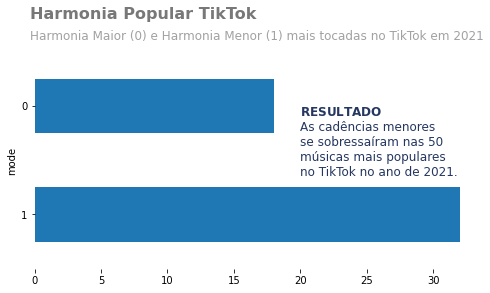

In [226]:
# definindo cores do gráfico
CINZA1, CINZA2, CINZA3= "#CFCDCE", "#A2A1A3", "#787878"
AZUL1, AZUL2 = "#8db7eb", "#253760"

mode=df.sort_values(by='track_pop', ascending=False).head(50).value_counts('mode')

# configurar a visualização
width_bar = 0.0

fig, ax = plt.subplots(figsize=(8, 4))

df.sort_values(by='track_pop', ascending=False).head(50).value_counts('mode').plot(kind='barh')

# remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# plotar título
plt.text(-0.35, 1.8, 'Harmonia Popular TikTok',
         fontsize=16, 
         color=CINZA3,
         weight='bold')

# plotar subtitulo
plt.text(-0.35, 1.7,
         "Harmonia Maior (0) e"
         " Harmonia Menor (1)"
         " mais tocadas no TikTok em 2021",
         verticalalignment="top",
         fontsize=12,
         color=CINZA2)

# plotar anotações do resultado da campanha
plt.text(20, 1,
         "$\\bf{RESULTADO}$\n"
         "As cadências menores\n"
         "se sobressaíram nas 50\n"
         "músicas mais populares\n"
         "no TikTok no ano de 2021."
         ,
         verticalalignment="top",
         fontsize=12,
         color=AZUL2)

# plotar o gráfico
plt.show()



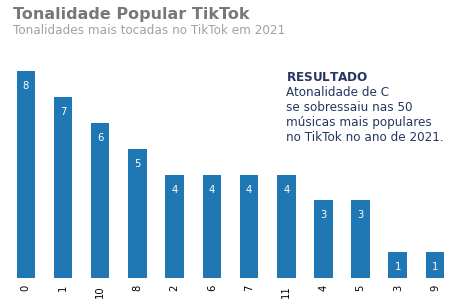

In [231]:
# definindo cores do gráfico
CINZA1, CINZA2, CINZA3= "#CFCDCE", "#A2A1A3", "#787878"
AZUL1, AZUL2 = "#8db7eb", "#253760"

# configurar a visualização
width_bar = 0.0

key=df.sort_values(by='track_pop', ascending=False).head(50).value_counts('key')

fig, ax = plt.subplots(figsize=(8, 4))

# labels do eixo
x = np.arange(len(key))

# parametro para plotagem
rects1 = ax.bar(x - width_bar/2, key, width_bar, label='Antes')

df.sort_values(by='track_pop', ascending=False).head(50).value_counts('key').plot(kind='bar')
plt.xticks(rotation=90)
ax.set_xlabel('')

# remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True)

# criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0., -20),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="white",
                    )
        
# plotar labels dentro das barras
autolabel(rects1)

# plotar título
plt.text(-0.35, 10, 'Tonalidade Popular TikTok',
         fontsize=16, 
         color=CINZA3,
         weight='bold')

# plotar subtitulo

plt.text(-0.35, 9.8,
         "Tonalidades mais tocadas"
         " no TikTok em 2021",
         verticalalignment="top",
         fontsize=12,
         color=CINZA2)

# plotar anotações do resultado da campanha
plt.text(7, 8,
         "$\\bf{RESULTADO}$\n"
         "Atonalidade de C\n"
         "se sobressaiu nas 50\n"
         "músicas mais populares\n"
         "no TikTok no ano de 2021."
         ,
         verticalalignment="top",
         fontsize=12,
         color=AZUL2)


# plotar o gráfico
plt.show()




In [221]:
df.sort_values(by='track_pop', ascending=False).head(50)['danceability'].mean()

0.6826199999999999

In [222]:
df.sort_values(by='track_pop', ascending=False).head(50)['energy'].mean()

0.6933

In [223]:
df.sort_values(by='track_pop', ascending=False).head(50)['loudness'].mean()

-5.85682

___

Podemos perceber que as cadências menores se sobressaíram em torno de quase 50% e as tonalidades, apesar de haver um destaque, são dados mais dispersos entre as 50 músicas mais tocadas.

Quanto a dançabilidade e a energia, podemos considerar que possuem médias praticamente iguais nas 50 músicas mais tocadas. O fator volume ficou na mésdia de -5,86 Db.

Desta maneira, podemos concluir que uma música que possivelmente seria popular no TikTok no ano de 2021 possuiria características de cadência harmônicas e melódicas menores, independente de tonalidade, com um nível de dançabilidade e energia próximo aos 70%. Esses dois últimos fatores se comprovam ao analisarmos que a rede TikTok tem como conteúdo principal vídeos de pessoas dançando.

---